<div class="alert alert-block alert-info">  
<h1><center><strong>Face Mask Detection Implementations</strong></center></h1>
        
</div>

<center><img src="https://image.freepik.com/free-vector/coronavirus-pandemic-prevention-medical-mask-icon-coronavirus-protection_194782-86.jpg"></center>

<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [1]:
import os
import cv2
import random
import skimage
import numpy as np
import seaborn as sns
from tqdm import tqdm
from skimage import filters
from numpy import expand_dims
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import confusion_matrix, roc_curve
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout



import warnings
warnings.filterwarnings("ignore") 

<h4>How we can install the libraries in python?</h4>

<h4>To install the python library is very easy</h4>
- pip install name_of_library 
<h5> Like if you wanted to install wordcloud? </h5>
- pip install tensorflow

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading the data 📁 📂</strong></center></h2>
        
</div>

In [2]:
with_maskImage = './Dataset/with_mask'
without_maskImage = './Dataset/without_mask'
mask_files = os.listdir(with_maskImage)
without_mask_files = os.listdir(without_maskImage)

<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploratory data analysis 🔎</strong></center></h2>
        
</div>

In [3]:
image_categories = []
image_samples = []
for i in os.listdir("./Dataset/"):
    image_categories.append(i)
    image_samples.append(len(os.listdir("./Dataset/"+ i)))
print("Count of dataset images is :", sum(image_samples))

Count of dataset images is : 11792


### Distribution of Classes with counts

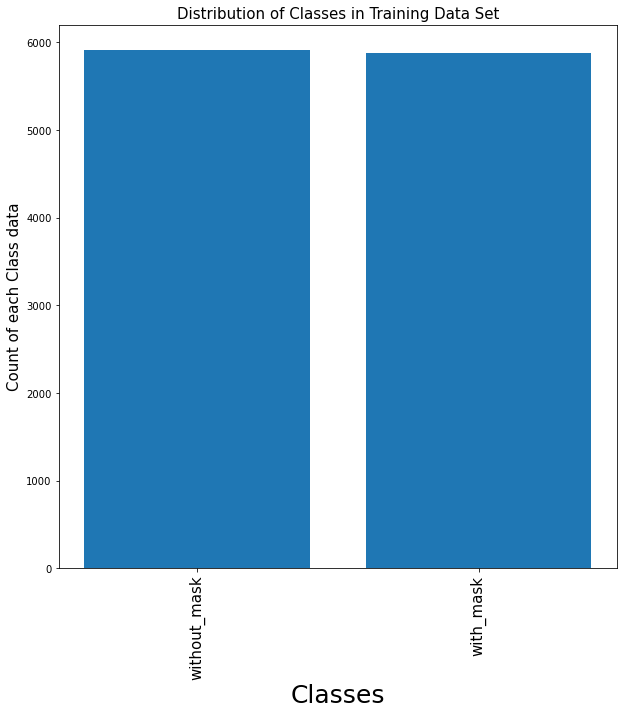

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
index = np.arange(len(image_categories))
plt.bar(index, image_samples)
plt.xlabel('Classes', fontsize=25)
plt.ylabel('Count of each Class data', fontsize=15)
plt.xticks(index, image_categories, fontsize=15, rotation=90)
plt.title('Distribution of Classes in Training Data Set', fontsize=15)
plt.show()

### Visualizing the images without mask

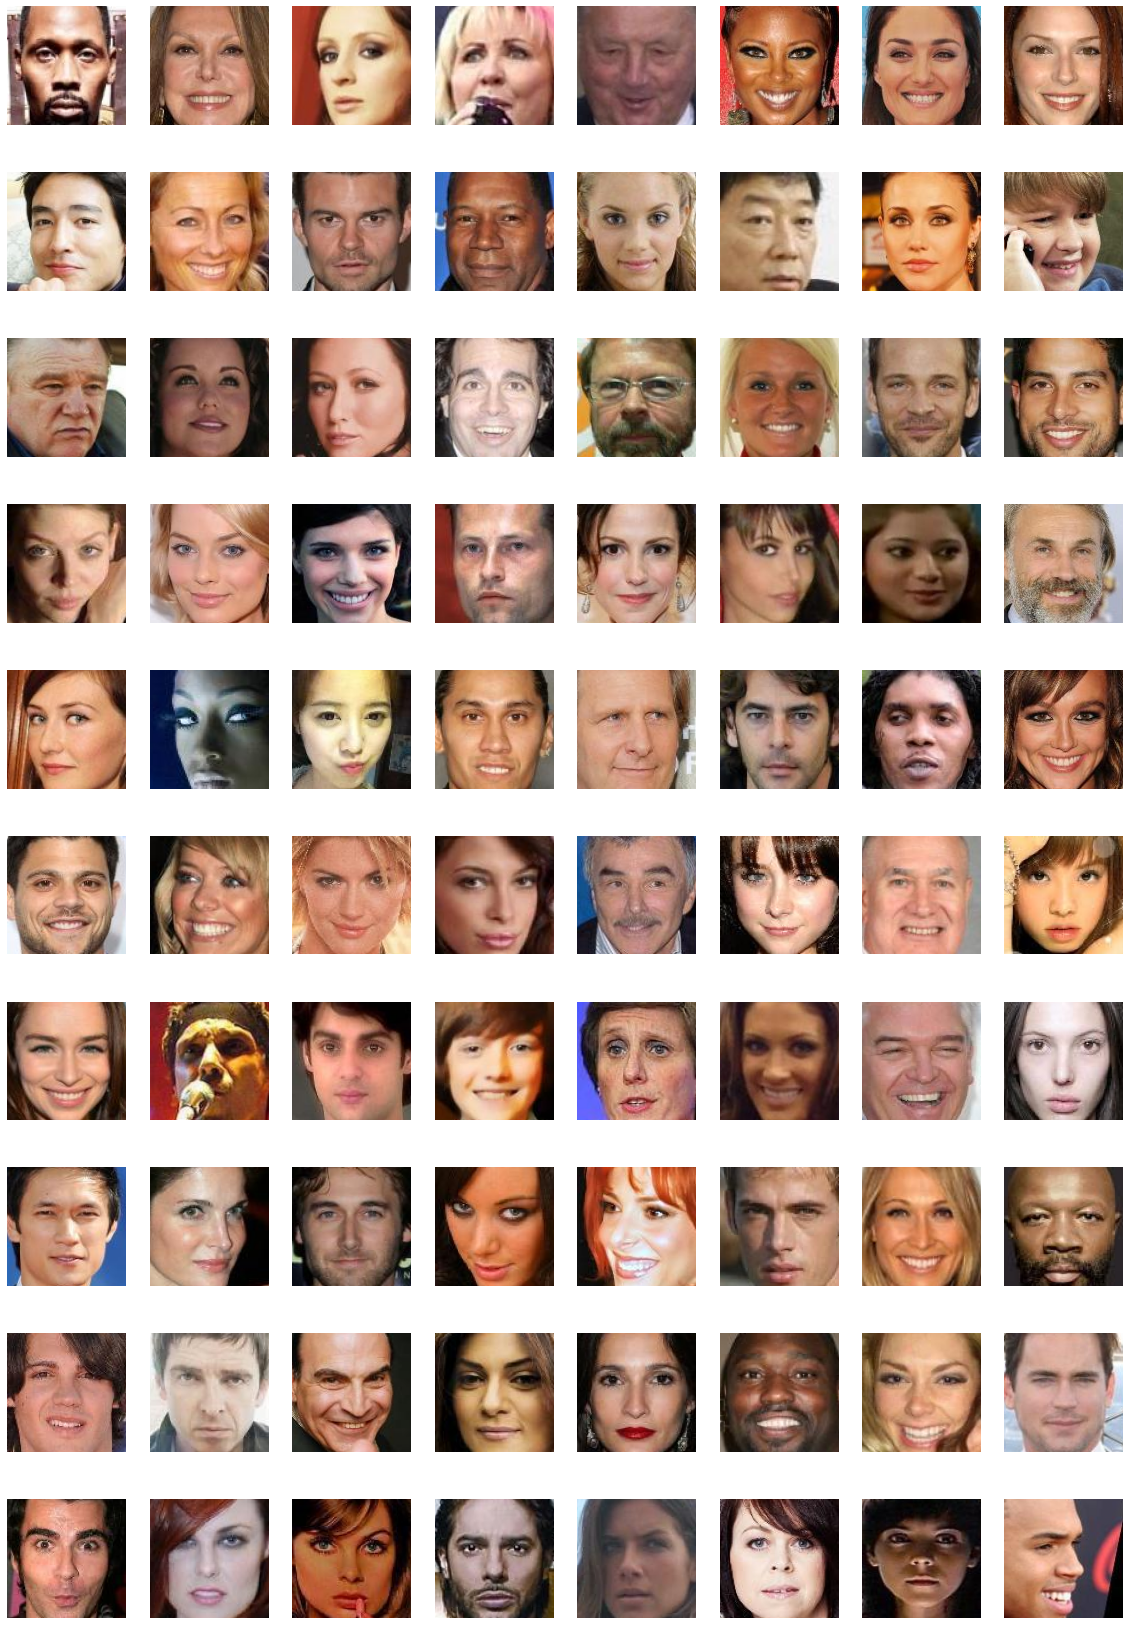

In [5]:
rows=10 #rows in subplots
cols=8 #columns in subplots
fig,ax = plt.subplots(rows,cols,figsize=(20,30))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(without_maskImage,without_mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

### Visualizing the images with mask

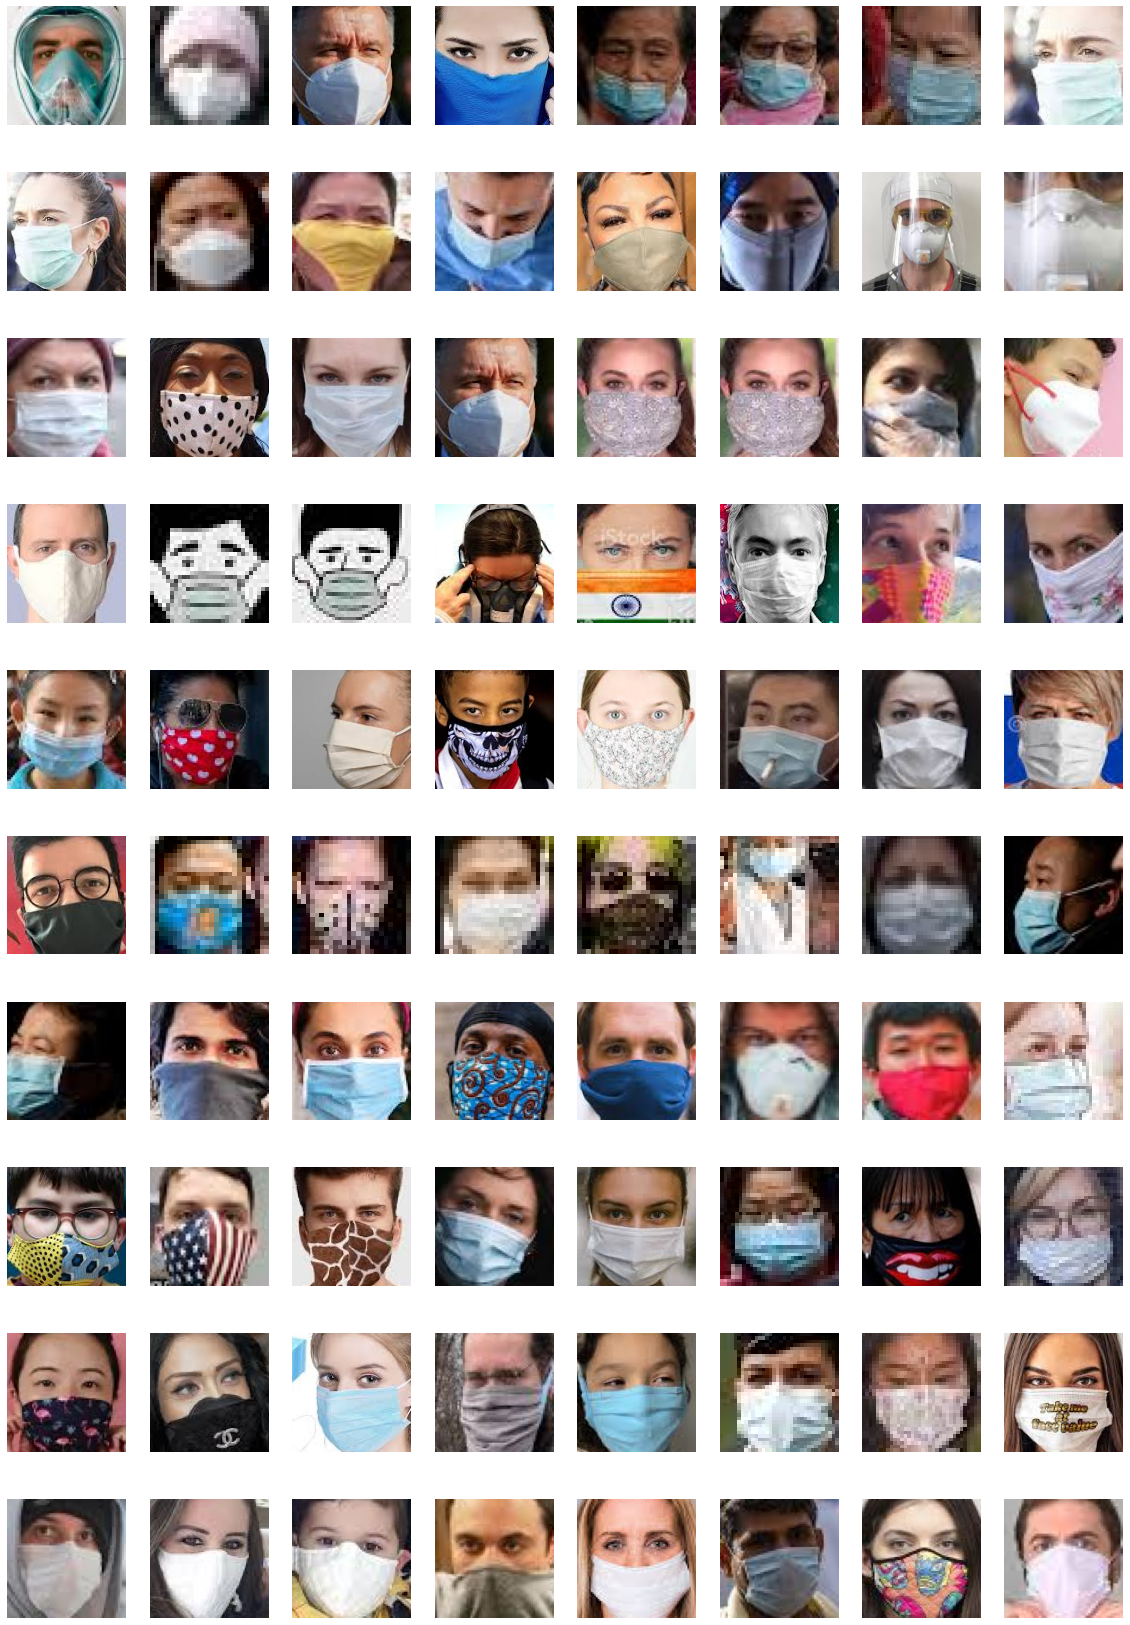

In [6]:
rows=10 #rows in subplots
cols=8 #columns in subplots
fig,ax = plt.subplots(rows,cols,figsize=(20,30))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(with_maskImage,mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

<div class="alert alert-block alert-danger">  
<h1><center><strong>Features Extraction and Data Preprocessing</strong></center></h1>
</div>

In [7]:
train_dir = 'Dataset/' 
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in   ['without_mask']:
                label = 0
            elif folderName in ['with_mask']:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                
                if img_file.size  > 500:
                    if img_file is not None:
                        img_file = skimage.transform.resize(img_file, (224, 224, 3))
                        img_arr = np.asarray(img_file)
                        X.append(img_arr)
                        y.append(label)
                else:
                    print('Not pass')
    X = np.asarray(X)  
    y = np.asarray(y)
    return X,y
X, y= get_data(train_dir)

  1%|▊                                                                              | 63/5909 [00:00<00:18, 317.34it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  2%|█▎                                                                            | 100/5909 [00:00<00:17, 336.68it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  3%|██▏                                                                           | 165/5909 [00:00<00:20, 286.52it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  3%|██▌                                                                           | 194/5909 [00:00<00:22, 258.91it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  4%|███▍                                                                          | 260/5909 [00:00<00:19, 290.44it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  5%|████▎                                                                         | 323/5909 [00:01<00:19, 293.38it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  6%|█████                                                                         | 384/5909 [00:01<00:19, 284.16it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  8%|█████▉                                                                        | 449/5909 [00:01<00:18, 302.95it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  8%|██████▍                                                                       | 486/5909 [00:01<00:16, 321.91it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 10%|███████▍                                                                      | 565/5909 [00:01<00:15, 340.99it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 11%|████████▌                                                                     | 650/5909 [00:02<00:13, 379.16it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 12%|█████████▋                                                                    | 730/5909 [00:02<00:13, 374.49it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 13%|██████████▏                                                                   | 769/5909 [00:02<00:13, 376.84it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass

 14%|███████████▏                                                                  | 845/5909 [00:02<00:13, 375.70it/s]


Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 16%|████████████▏                                                                 | 926/5909 [00:02<00:12, 389.30it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 17%|█████████████                                                                | 1007/5909 [00:02<00:12, 384.37it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 18%|██████████████▏                                                              | 1092/5909 [00:03<00:12, 399.91it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 19%|██████████████▊                                                              | 1133/5909 [00:03<00:11, 400.63it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 21%|███████████████▊                                                             | 1213/5909 [00:03<00:12, 375.12it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 22%|████████████████▉                                                            | 1300/5909 [00:03<00:11, 401.22it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 24%|██████████████████                                                           | 1389/5909 [00:03<00:10, 420.87it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 24%|██████████████████▋                                                          | 1432/5909 [00:04<00:12, 359.83it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 25%|███████████████████▏                                                         | 1470/5909 [00:04<00:15, 284.30it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 26%|████████████████████▏                                                        | 1547/5909 [00:04<00:13, 320.64it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 28%|█████████████████████▎                                                       | 1635/5909 [00:04<00:11, 372.63it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 28%|█████████████████████▉                                                       | 1680/5909 [00:04<00:10, 393.29it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 30%|██████████████████████▉                                                      | 1764/5909 [00:05<00:10, 400.24it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 31%|████████████████████████▏                                                    | 1853/5909 [00:05<00:09, 419.37it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 32%|████████████████████████▋                                                    | 1896/5909 [00:05<00:09, 415.43it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass

 33%|█████████████████████████▎                                                   | 1938/5909 [00:05<00:10, 365.93it/s]


Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass

 34%|██████████████████████████▏                                                  | 2009/5909 [00:05<00:12, 308.98it/s]


Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 35%|███████████████████████████                                                  | 2079/5909 [00:05<00:11, 326.70it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 36%|████████████████████████████                                                 | 2149/5909 [00:06<00:11, 335.07it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass

 37%|████████████████████████████▍                                                | 2184/5909 [00:06<00:11, 316.07it/s]


Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 38%|█████████████████████████████▎                                               | 2250/5909 [00:06<00:12, 301.97it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 39%|██████████████████████████████                                               | 2311/5909 [00:06<00:12, 289.29it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 40%|███████████████████████████████                                              | 2383/5909 [00:06<00:10, 321.38it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 41%|███████████████████████████████▌                                             | 2424/5909 [00:07<00:10, 346.59it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 42%|████████████████████████████████▋                                            | 2510/5909 [00:07<00:09, 360.70it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 43%|█████████████████████████████████▏                                           | 2547/5909 [00:07<00:10, 334.17it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 44%|██████████████████████████████████                                           | 2615/5909 [00:07<00:11, 276.30it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 45%|██████████████████████████████████▍                                          | 2644/5909 [00:07<00:12, 267.83it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 46%|███████████████████████████████████▌                                         | 2732/5909 [00:08<00:09, 344.78it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 48%|████████████████████████████████████▊                                        | 2823/5909 [00:08<00:07, 391.56it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass

 49%|█████████████████████████████████████▊                                       | 2905/5909 [00:08<00:07, 394.74it/s]


Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 51%|███████████████████████████████████████                                      | 3000/5909 [00:08<00:06, 429.56it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 52%|███████████████████████████████████████▋                                     | 3047/5909 [00:08<00:06, 438.91it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 53%|████████████████████████████████████████▉                                    | 3138/5909 [00:09<00:06, 397.19it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 55%|█████████████████████████████████████████▉                                   | 3223/5909 [00:09<00:06, 401.56it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 56%|███████████████████████████████████████████                                  | 3308/5909 [00:09<00:06, 411.33it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 57%|███████████████████████████████████████████▋                                 | 3350/5909 [00:09<00:06, 393.45it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 58%|████████████████████████████████████████████▋                                | 3427/5909 [00:09<00:06, 357.48it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 59%|█████████████████████████████████████████████▏                               | 3465/5909 [00:09<00:06, 360.74it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 60%|██████████████████████████████████████████████                               | 3538/5909 [00:10<00:06, 346.74it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 61%|███████████████████████████████████████████████▎                             | 3629/5909 [00:10<00:05, 405.82it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 63%|████████████████████████████████████████████████▍                            | 3719/5909 [00:10<00:05, 417.48it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 65%|█████████████████████████████████████████████████▋                           | 3813/5909 [00:10<00:04, 444.65it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 65%|██████████████████████████████████████████████████▎                          | 3858/5909 [00:10<00:04, 419.89it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 67%|███████████████████████████████████████████████████▎                         | 3942/5909 [00:11<00:05, 382.44it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 67%|███████████████████████████████████████████████████▉                         | 3981/5909 [00:11<00:05, 372.37it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 69%|████████████████████████████████████████████████████▊                        | 4054/5909 [00:11<00:05, 341.91it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 70%|██████████████████████████████████████████████████████                       | 4151/5909 [00:11<00:04, 395.78it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 72%|███████████████████████████████████████████████████████▎                     | 4241/5909 [00:11<00:03, 419.91it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 72%|███████████████████████████████████████████████████████▊                     | 4284/5909 [00:11<00:03, 415.53it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 74%|████████████████████████████████████████████████████████▉                    | 4367/5909 [00:12<00:04, 384.36it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 76%|██████████████████████████████████████████████████████████▏                  | 4465/5909 [00:12<00:03, 433.13it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 77%|███████████████████████████████████████████████████████████▋                 | 4576/5909 [00:12<00:02, 490.77it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 79%|█████████████████████████████████████████████████████████████                | 4686/5909 [00:12<00:02, 517.70it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 80%|█████████████████████████████████████████████████████████████▊               | 4739/5909 [00:12<00:02, 518.78it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 82%|███████████████████████████████████████████████████████████████              | 4843/5909 [00:13<00:02, 501.04it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 84%|████████████████████████████████████████████████████████████████▍            | 4944/5909 [00:13<00:02, 443.71it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 84%|█████████████████████████████████████████████████████████████████            | 4990/5909 [00:13<00:02, 397.14it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 85%|█████████████████████████████████████████████████████████████████▌           | 5031/5909 [00:13<00:02, 346.62it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 86%|██████████████████████████████████████████████████████████████████▌          | 5105/5909 [00:13<00:02, 350.99it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 88%|███████████████████████████████████████████████████████████████████▌         | 5184/5909 [00:14<00:02, 358.36it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 88%|████████████████████████████████████████████████████████████████████▏        | 5228/5909 [00:14<00:01, 379.62it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 90%|█████████████████████████████████████████████████████████████████████▎       | 5320/5909 [00:14<00:01, 408.20it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 92%|██████████████████████████████████████████████████████████████████████▍      | 5410/5909 [00:14<00:01, 384.92it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 92%|███████████████████████████████████████████████████████████████████████      | 5450/5909 [00:14<00:01, 365.40it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 93%|███████████████████████████████████████████████████████████████████████▉     | 5524/5909 [00:15<00:01, 343.04it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 95%|█████████████████████████████████████████████████████████████████████████▏   | 5614/5909 [00:15<00:00, 397.59it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 96%|█████████████████████████████████████████████████████████████████████████▋   | 5659/5909 [00:15<00:00, 410.15it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 97%|███████████████████████████████████████████████████████████████████████████  | 5757/5909 [00:15<00:00, 438.31it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 99%|████████████████████████████████████████████████████████████████████████████▏| 5846/5909 [00:15<00:00, 407.00it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  0%|                                                                                         | 0/5883 [00:00<?, ?it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  1%|▍                                                                              | 35/5883 [00:00<00:22, 261.35it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  2%|█▎                                                                             | 98/5883 [00:00<00:20, 281.66it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  2%|█▋                                                                            | 127/5883 [00:00<00:25, 222.92it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  3%|██▋                                                                           | 199/5883 [00:00<00:20, 273.91it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  4%|███                                                                           | 229/5883 [00:00<00:20, 279.00it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass

  5%|███▊                                                                          | 286/5883 [00:01<00:24, 230.50it/s]


Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass

  5%|████▏                                                                         | 312/5883 [00:01<00:23, 237.43it/s]


Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  7%|█████                                                                         | 386/5883 [00:01<00:19, 279.94it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  7%|█████▊                                                                        | 441/5883 [00:01<00:23, 234.99it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  8%|██████▍                                                                       | 483/5883 [00:01<00:19, 280.67it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


  9%|███████▎                                                                      | 556/5883 [00:02<00:17, 310.92it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 10%|███████▊                                                                      | 589/5883 [00:02<00:17, 295.70it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 11%|████████▌                                                                     | 649/5883 [00:02<00:21, 242.69it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 12%|████████▉                                                                     | 677/5883 [00:02<00:22, 227.18it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 13%|█████████▉                                                                    | 754/5883 [00:02<00:18, 284.22it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 14%|██████████▉                                                                   | 825/5883 [00:03<00:16, 310.32it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


 15%|███████████▊                                                                  | 895/5883 [00:03<00:16, 303.26it/s]

Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass
Not pass


100%|██████████████████████████████████████████████████████████████████████████████| 5883/5883 [02:32<00:00, 38.55it/s]


### Shape of the data

In [8]:
#input features 
X.shape

(5091, 224, 224, 3)

In [9]:
#output class
y.shape

(5091,)

### Text labels

In [10]:
Labels = ['With Mask','Without Mask']

In [11]:
Labels

['With Mask', 'Without Mask']

<b> <h3> Label : </h3></b>  Labels are the classes like in this project with mask and without mask. 

<b> <h3> Input features : </h3></b>  Input features are the data features that we extracted from the images and will feed into models for training and testing.

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to model so that model can learn from the data.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true label with predicted label and get the performance of the model.

### Normalizing the dataset

In [12]:
X=X/255

### Split the 70% data as Training and 30% as Testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

<div class="alert alert-block alert-success">  
<h1><center><strong>Data augmentation of training data</strong></center></h1>
</div>

<center><img src="https://miro.medium.com/max/432/1*afUcgATPU4jjcDCkxpsH_A.png"></center>

### Data augmentation function

In [14]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=True, 
    vertical_flip=True)

### Calling Random Image from without mask image

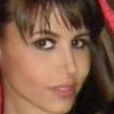

In [15]:
a=random.randint(1,1000)
load_img(os.path.join(without_maskImage,without_mask_files[a]))

### Applying the Data augmentation function to get the augmentated images of above

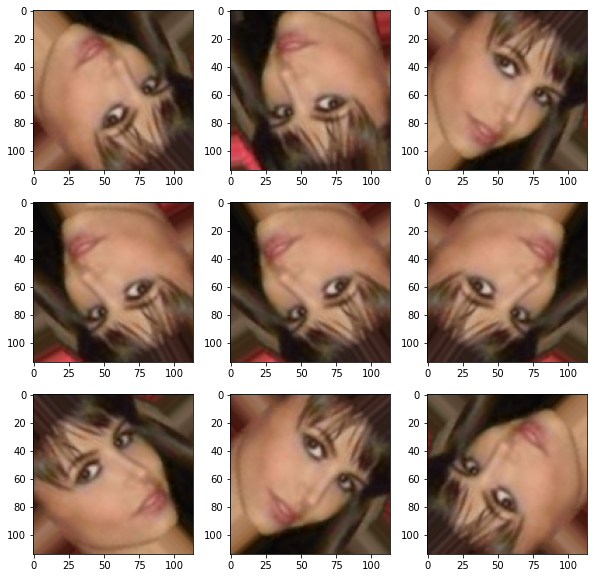

In [16]:
img = load_img(without_maskImage+'/'+without_mask_files[a])  
data = img_to_array(img)
samples = expand_dims(data, 0)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

### Calling Random Image from with mask image

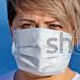

In [17]:
a=random.randint(1,1000)
load_img(os.path.join(with_maskImage,mask_files[a]))

### Applying the Data augmentation function to get the augmentated images of above

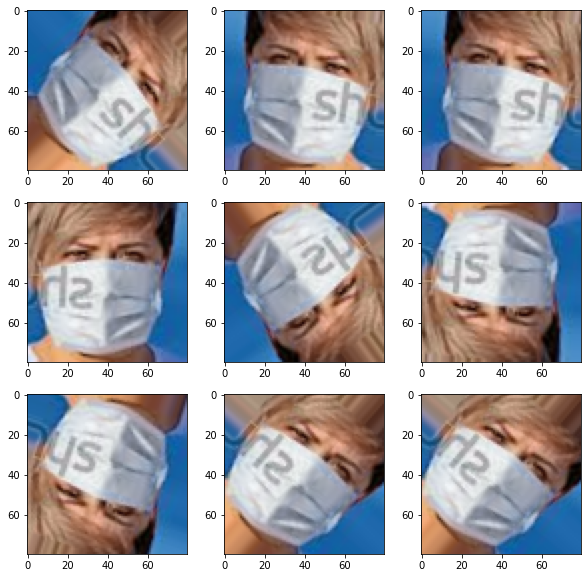

In [18]:
img = load_img(with_maskImage+'/'+mask_files[a])  
data = img_to_array(img)
samples = expand_dims(data, 0)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

<div class="alert alert-block alert-info">  
<h2><center><strong>ResNet 50 Model as Transfer learning</strong></center></h2>
        
</div>

In [72]:
res = ResNet50(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = res.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=res.input, outputs=outputs)

for layer in res.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)


In [73]:
model.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

### Training the model with data augmentation

In [17]:
history = model.fit(dataget.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=500)

Epoch 1/500
24/23 [==============================] - 7s 302ms/step - loss: 1.0197 - accuracy: 0.6051 - val_loss: 0.8021 - val_accuracy: 0.6117
Epoch 2/500
24/23 [==============================] - 7s 298ms/step - loss: 0.8803 - accuracy: 0.6503 - val_loss: 0.8184 - val_accuracy: 0.6277
Epoch 3/500
24/23 [==============================] - 7s 298ms/step - loss: 0.9541 - accuracy: 0.6383 - val_loss: 0.5332 - val_accuracy: 0.7447
Epoch 4/500
24/23 [==============================] - 7s 300ms/step - loss: 0.9481 - accuracy: 0.6303 - val_loss: 0.6110 - val_accuracy: 0.6968
Epoch 5/500
24/23 [==============================] - 7s 299ms/step - loss: 0.9143 - accuracy: 0.6529 - val_loss: 0.4753 - val_accuracy: 0.7819
Epoch 6/500
24/23 [==============================] - 7s 306ms/step - loss: 1.2179 - accuracy: 0.6051 - val_loss: 0.5150 - val_accuracy: 0.7872
Epoch 7/500
24/23 [==============================] - 7s 308ms/step - loss: 1.3787 - accuracy: 0.5904 - val_loss: 2.2570 - val_accuracy: 0.5957

<div class="alert alert-block alert-success">  
<h1><center><strong>Getting Predictions on Test data and Evaluation on different Measures</strong></center></h1>
</div>

In [74]:
y_pred = model.predict(X_test, batch_size=batch_size)

In [75]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

### Plot ROC Curve

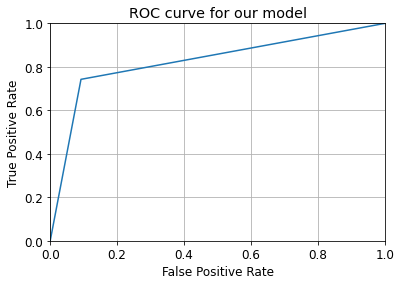

In [32]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Plot Confusion Matrix

Confusion Matrix with Normalized Values


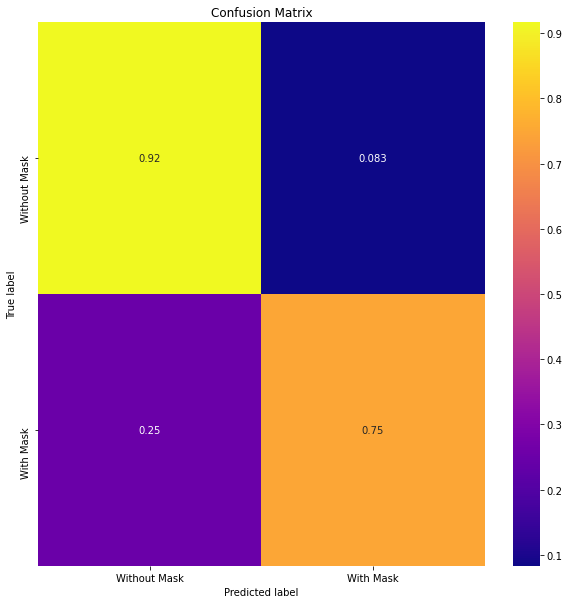

In [81]:
def plot_confusion_matrix(normalize):
  classes = ['Without Mask','With Mask']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

### Accuray, Precision, Recall and F1 Measures 

In [34]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        87
           1       0.90      0.74      0.82       101

    accuracy                           0.82       188
   macro avg       0.83      0.83      0.82       188
weighted avg       0.83      0.82      0.82       188



### Traning and Testing Accuracy

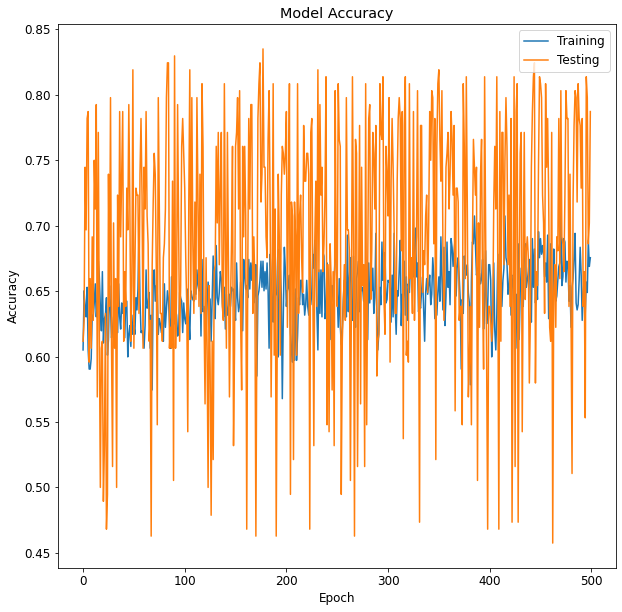

In [27]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.show()


# Traning and Testing Loss

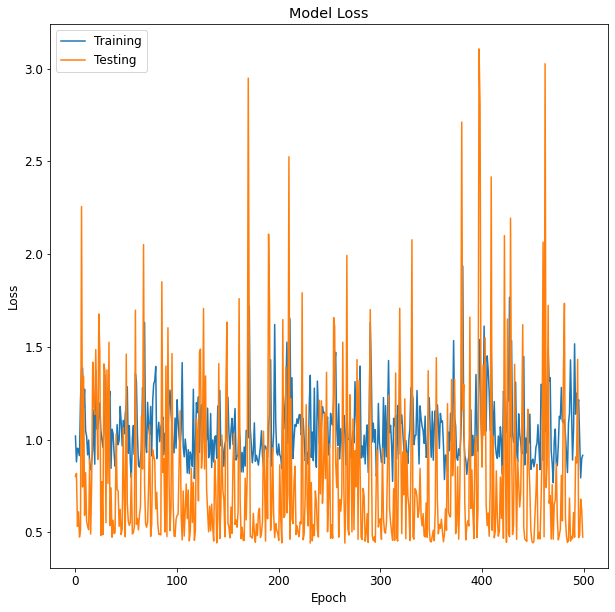

In [28]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.show()